<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/youtube_trending_video_predictor_using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I try to predict the view count of trending videos on yt

based on the title, the channel and the tags

dataset link:

https://www.kaggle.com/datasets/die9origephit/youtube-trending-videos-in-mediterranean-countries


The dataset includes YouTube trending videos statistics for Mediterranean

countries on 2022-11-07.

It contains 15 columns and it's related to 19 countries:

* IT - Italy
* ES - Spain
* GR - Greece
* HR - Croatia
* TR - Turkey
* AL - Albania
* DZ - Algeria
* EG - Egypt
* LY - Lybia
* TN - Tunisia
* MA - Morocco
* IL - Israel
* ME - Montenegro
* LB - Lebanon
* FR - France
* BA - Bosnia and Herzegovina
* MT - Malta
* SI - Slovenia
* CY - Cyprus
* SY - Syria

**Inspiration**

You can perform an exploratory data analysis of the data, working with Pandas

or Numpy; and you can practice queries using SQL or the Pandas functions.

Also, it's possible to analyze the titles, the tags and the description of the
 videos to search for relevant information.

Remember to upvote if you found the dataset useful :).


**Collection methodology**

The original data were scraped using a tool that you can find here here.
Only the Mediterranean countries were considered and the datasets related to different countries were put together in one csv file, adding the country column.
The likes and dislikes columns were removed due to the fact that, at the moment, it's not possible to visualize them through the API.

In [ ]:
from google.colab import files
f = files.upload()

Saving youtube_trending_mediterranean.csv to youtube_trending_mediterranean.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('youtube_trending_mediterranean.csv')
df = df.dropna()
df.head()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,2022-07-07T22:00:12Z,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,22.11.07,[none],5130167,3641,https://i.ytimg.com/vi/hxWSp-8jJuo/default.jpg,False,True,Stream or Download now ''KATILE'' ð https:/...
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official ...,2022-06-30T22:00:11Z,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,22.11.07,[none],8886648,4414,https://i.ytimg.com/vi/MnrC9mk2H1o/default.jpg,False,True,The official video for GAJDE.Stream/Download G...
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,2022-07-02T22:00:11Z,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,22.11.07,Butrint Imeri|Kida|Dale|Butrint imeri kida|But...,7230818,7518,https://i.ytimg.com/vi/5Ql-G0dTqC0/default.jpg,False,True,Stream or Download âAM/PMâ here ð§ https...
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,2022-07-07T22:00:12Z,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,22.11.07,Dafina|Zeqiri|Dafine Moj|Pa ty|Lule Lule|Duro|...,1406078,827,https://i.ytimg.com/vi/oUdY0qSavvY/default.jpg,False,True,Bzzz Entertainment - https://lnk.to/BzzzStream...
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,2022-06-30T18:00:26Z,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,22.11.07,tayna|Friends|Entertainment|rinor hykolli|hip ...,6397676,6063,https://i.ytimg.com/vi/I4ZSvYLnOcQ/default.jpg,False,True,Stream âTequilaâ:https://taynaxazet.lnk.to...


In [ ]:
# dropping useless columns
df.pop('video_id')
df.pop('publishedAt')
df.pop('channelId')
df.pop('thumbnail_link')
df.pop('trending_date')

0       22.11.07
1       22.11.07
2       22.11.07
3       22.11.07
4       22.11.07
          ...   
3016    22.11.07
3017    22.11.07
3018    22.11.07
3019    22.11.07
3020    22.11.07
Name: trending_date, Length: 2890, dtype: object

In [ ]:
# videos popular in Italy :)
italy = df[df.country == 'IT']
italy.head()

,country,title,channelTitle,categoryId,tags,view_count,comment_count,comments_disabled,ratings_disabled,description
1558,IT,Me contro Te - Vamos a la Fiesta (Videoclip),Me contro Te Music,10,me contro te|me contro te music|me contro te c...,559337,2288,False,True,La nuova canzone di SofÃ¬ e LuÃ¬ Vamos a la fi...
1559,IT,INTER vs FC MILANESE 10-0 | HIGHLIGHTS â«ðµ,Inter,17,Inter|Internazionale|Inter Milan|fc inter|FC I...,409777,656,False,True,Allenamento congiunto per l'Inter oggi ad Appi...
1560,IT,"Boomdabash, Annalisa - Tropicana",BoomdabashVEVO,10,Boomdabash|Annalisa|Tropicana|Universal|Music|...,1360436,2542,False,True,âTROPICANAâ con ANNALISA Ã¨ fuori ovunque:...
1561,IT,BEHIND THE SCENES | ÃNGEL DI MARÃA #WelcomeÃ...,Juventus,17,juventus|juventus fc|juve|juventus football|ro...,318221,687,False,True,Take a closer look at all the behind the scene...
1562,IT,ROMA-TRASTEVERE | Ecco tutti i gol segnati dai...,AS Roma,17,as roma|serie a|roma|giallorossi|smalling|shom...,173425,373,False,True,Ecco gli highlights del test di allenamento co...


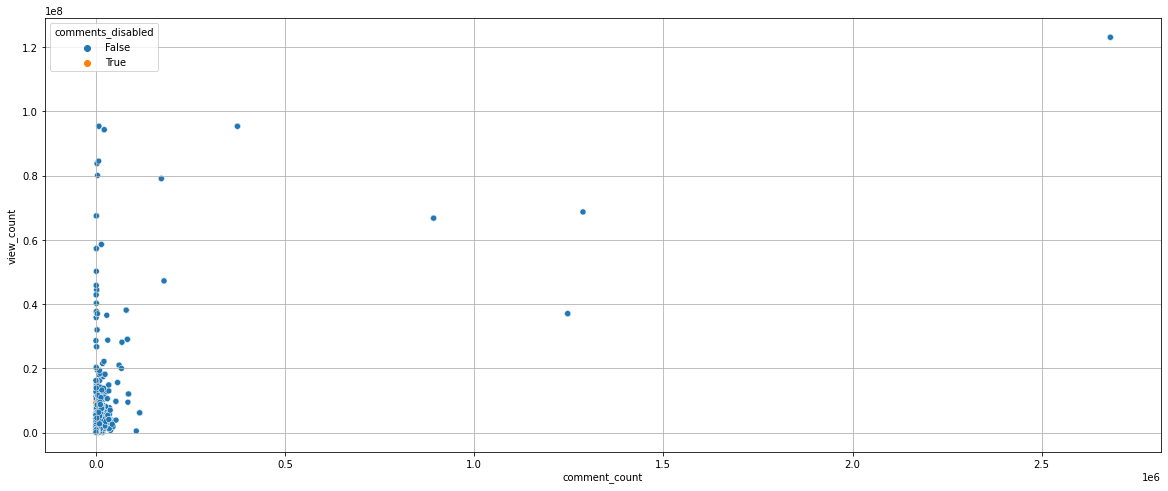

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,8)
sns.scatterplot( x = 'comment_count', y = 'view_count', hue = 'comments_disabled', data = df, ax = ax)
plt.grid()

In [ ]:
view_count = df.pop('view_count')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.8 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 
     |████████████████████████████████| 596 kB 57.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import TFAutoModel, AutoTokenizer
checkpoint = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
bert = TFAutoModel.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
df.shape

(2890, 9)

In [ ]:
df.country[12]

'AL'

In [ ]:
coutry_ids = np.zeros(shape = (2890,4))
country_attention_mask = np.zeros(shape = (2890,4))

title_ids = np.zeros(shape = (2890,20))
title_attention_mask = np.zeros(shape = (2890,20))

channel_title_ids = np.zeros(shape = (2890,20))
channel_title_attention_mask = np.zeros(shape = (2890,20))

tags_ids = np.zeros(shape = (2890,40))
tags_attention_mask = np.zeros(shape = (2890,40))

description_ids = np.zeros(shape = (2890,100))
description_attention_mask = np.zeros(shape = (2890,100))

for i,el in enumerate(df.country): # 2890 is the number of rows
  t_country = tokenizer(el, max_length = 4, truncation = True, padding = 'max_length', return_tensors='tf', return_token_type_ids = False)
  coutry_ids[i,:] =  t_country['input_ids']
  country_attention_mask[i,:] = t_country['attention_mask']

for i,el in enumerate(df.title):
  t_title = tokenizer(el, max_length = 20, truncation = True, padding = 'max_length', return_tensors='tf', return_token_type_ids = False)
  title_ids[i,:] = t_title['input_ids']
  title_attention_mask[i,:] = t_title['attention_mask']

for i,el in enumerate(df.channelTitle):
  t_channel = tokenizer(el, max_length = 20, truncation = True, padding = 'max_length', return_tensors='tf', return_token_type_ids = False)
  channel_title_ids[i,:] =  t_channel['input_ids']
  channel_title_attention_mask[i,:] = t_channel['attention_mask']

for i,el in enumerate(df.tags):
  t_tags = tokenizer(el, max_length = 40, truncation = True, padding = 'max_length', return_tensors='tf', return_token_type_ids = False)
  tags_ids[i,:] = t_tags['input_ids']
  tags_attention_mask[i,:] = t_tags['attention_mask']

for i,el in enumerate(df.description):
  t_description = tokenizer(el, max_length = 100, truncation = True, padding = 'max_length', return_tensors='tf', return_token_type_ids = False)
  description_ids[i,:] = t_description['input_ids']
  description_attention_mask[i,:] = t_description['attention_mask']

In [ ]:
import tensorflow as tf

In [ ]:
# Now I expand the tensors dimensios to give bert the right shaped data
coutry_ids = tf.expand_dims(coutry_ids, axis = 1)
country_attention_mask = tf.expand_dims(country_attention_mask, axis = 1)

title_ids = tf.expand_dims(title_ids, axis = 1)
title_attention_mask = tf.expand_dims(title_attention_mask, axis = 1)

channel_title_ids = tf.expand_dims(channel_title_ids, axis = 1)
channel_title_attention_mask = tf.expand_dims(channel_title_attention_mask, axis = 1)

tags_ids = tf.expand_dims(tags_ids, axis = 1)
tags_attention_mask = tf.expand_dims(tags_attention_mask, axis = 1)

description_ids = tf.expand_dims(description_ids, axis = 1)
description_attention_mask = tf.expand_dims(description_attention_mask, axis = 1)

In [ ]:
view_count = tf.expand_dims(view_count, axis = 1)

In [ ]:
# creating the tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((coutry_ids, country_attention_mask, title_ids, title_attention_mask, channel_title_ids, channel_title_attention_mask,
                                                    tags_ids, tags_attention_mask, description_ids, description_attention_mask, view_count))

In [ ]:
# naming the sections of the dataset
def name_subsets(coutry_ids, country_attention_mask, title_ids, title_attention_mask, channel_title_ids, channel_title_attention_mask,
                                                    tags_ids, tags_attention_mask, description_ids, description_attention_mask, view_count):
  return {'coutry_ids':coutry_ids, 'country_attention_mask':country_attention_mask, 'title_ids':title_ids, 'title_attention_mask':title_attention_mask,
            'channel_title_ids':channel_title_ids, 'channel_title_attention_mask':channel_title_attention_mask,'tags_ids':tags_ids, 'tags_attention_mask':tags_attention_mask,
            'description_ids':description_ids, 'description_attention_mask':description_attention_mask, 'view_count':view_count},view_count

train_dataset = train_dataset.map(name_subsets)

In [ ]:
train_dataset = train_dataset.shuffle(1000)

In [ ]:
# dividing in training (80%) and validation (20%)
# 80% of 2890 is 2312, 20% of 2890 is 578
training_dataset = train_dataset.take(2312)
validation_dataset = train_dataset.skip(2312)

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dropout, Dense, Flatten, Concatenate, BatchNormalization

In [ ]:
# model
input_country_ids = Input(shape = (4,), name = 'coutry_ids', dtype = 'int32')
input_country_attention_mask = Input(shape = (4,), name = 'country_attention_mask', dtype = 'int32')

input_title_ids = Input(shape=(20,), name = 'title_ids', dtype = 'int32')
input_title_attention_mask = Input(shape = (20,), name = 'title_attention_mask', dtype = 'int32')

input_channel_title_ids = Input(shape = (20,), name = 'channel_title_ids', dtype = 'int32')
input_channel_title_attention_mask = Input(shape = (20,), name = 'channel_title_attention_mask', dtype = 'int32')

input_tags_ids = Input(shape = (40,), name = 'tags_ids', dtype = 'int32')
input_tags_attention_mask = Input(shape = (40,), name = 'tags_attention_mask', dtype = 'int32')

input_description_ids = Input(shape = (100,), name = 'description_ids', dtype = 'int32')
input_description_attention_mask = Input(shape = (100,), name = 'description_attention_mask', dtype = 'int32')

# bert layers
bert_country = bert(input_country_ids, input_country_attention_mask)[1]
bert_title = bert(input_title_ids, input_title_attention_mask)[1]
bert_channel_title = bert(input_channel_title_ids, input_channel_title_attention_mask)[1]
bert_tags = bert(input_tags_ids, input_tags_attention_mask)[1]
bert_description = bert(input_description_ids, input_description_attention_mask)[1]

# pre concatenate
normalization_country = BatchNormalization()(bert_country)
pre_concat_dense_country = Dense(units = 128, activation = 'relu')(normalization_country)

normalization_title = BatchNormalization()(bert_title)
pre_concat_dense_title = Dense(units = 128, activation = 'relu')(normalization_title)

normalization_channel_title = BatchNormalization()(bert_channel_title)
pre_concat_dense_channel_title = Dense(units = 128, activation = 'relu')(normalization_channel_title)

normalization_tags = BatchNormalization()(bert_tags)
pre_concat_dense_tags = Dense(units = 128, activation = 'relu')(normalization_tags)

normalization_description = BatchNormalization()(bert_description)
pre_concat_dense_description = Dense(units = 128, activation = 'relu')(normalization_description)

concat = Concatenate()([pre_concat_dense_country, pre_concat_dense_title, pre_concat_dense_channel_title, pre_concat_dense_tags, pre_concat_dense_description])

dense1 = Dense(units = 500, activation = 'relu')(concat)
d1 = Dropout(0.3)(dense1)
dense2 = Dense(units = 200, activation = 'relu')(d1)
d2 = Dropout(0.3)(dense2)
dense3 = Dense(units = 64, activation = 'relu')(d2)
d3 = Dropout(0.3)(dense3)
output_layer = Dense(units = 1)(d3)

model = Model(inputs = [
                    input_country_ids, input_country_attention_mask, input_title_ids, input_title_attention_mask, input_channel_title_ids, input_channel_title_attention_mask,
                    input_tags_ids, input_tags_attention_mask, input_description_ids, input_description_attention_mask
], outputs = output_layer, name = 'youtube_view_count_predictor')

model.layers[10].trainable = False
model.layers[11].trainable = False
model.layers[12].trainable = False
model.layers[13].trainable = False
model.layers[14].trainable = False

model.summary()

Model: "youtube_view_count_predictor"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 coutry_ids (InputLayer)        [(None, 4)]          0           []                               
                                                                                                  
 country_attention_mask (InputL  [(None, 4)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 title_ids (InputLayer)         [(None, 20)]         0           []                               
                                                                                                  
 title_attention_mask (InputLay  [(None, 20)]        0           []    

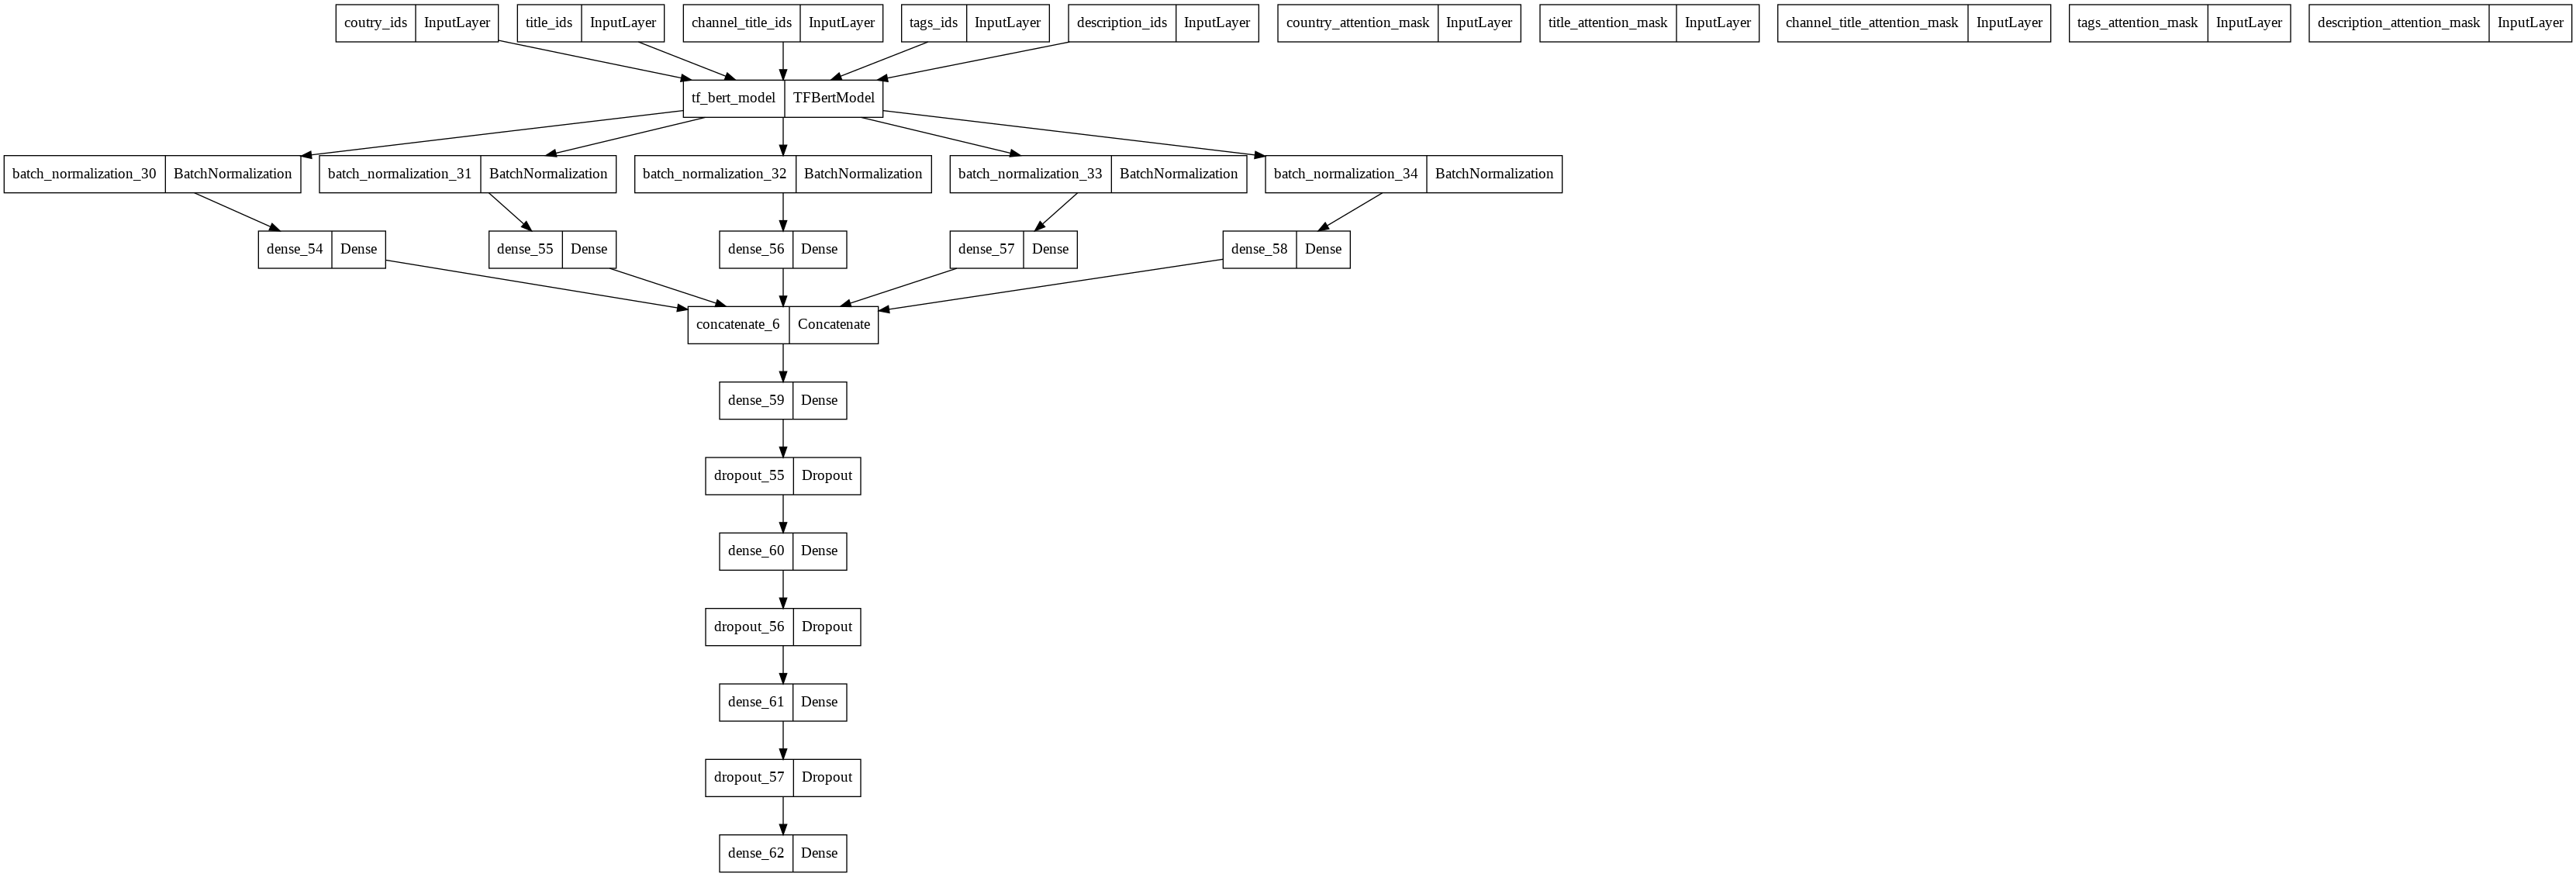

In [ ]:
tf.keras.utils.plot_model(model, to_file='youtube trending video predictor using bert.png')

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_percentage_error',
              metrics = ['mean_absolute_percentage_error', 'mean_absolute_error', 'mean_squared_error'])

training = model.fit(training_dataset,
                     validation_data = validation_dataset,
                     epochs = 100,
                     batch_size = 64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['view_count'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


 667/2312 [=======>......................] - ETA: 21:42 - loss: 4733057.5000 - mean_absolute_percentage_error: 191.5573 - mean_absolute_error: 4733057.5000 - mean_squared_error: 217152959283200.0000

KeyboardInterrupt: ignored